Pregunta 1:
En el presente ejercicio se explorar´a la recuperaci´on de se˜nales utilizando
bancos de filtros pasa bajo y pasa alto. El enfoque se centrar´a en c´omo la convoluci
´on de se˜nales, junto con sistemas de interpolaci´on y decimaci´on, permite
la reconstrucci´on de se˜nales a partir de sus componentes filtrados. Para ilustrar
este proceso, se desarrollar´a un programa que realice lo siguiente:

a) (1 pto.) Generar una se˜nal X, monocomponente, cuya frecuencia var´ıa linealmente
desde 0,1 a 0,4 en frecuencia normalizada (donde 0.5 representa
la frecuencia de Nyquist). Su amplitud tambi´en var´ıa linealmente desde 0
a 1. Mostrar la se˜nal y su espectro en frecuencia normalizada. Comentar

In [1]:
#Librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import chirp

Text(0, 0.5, 'Magnitud')

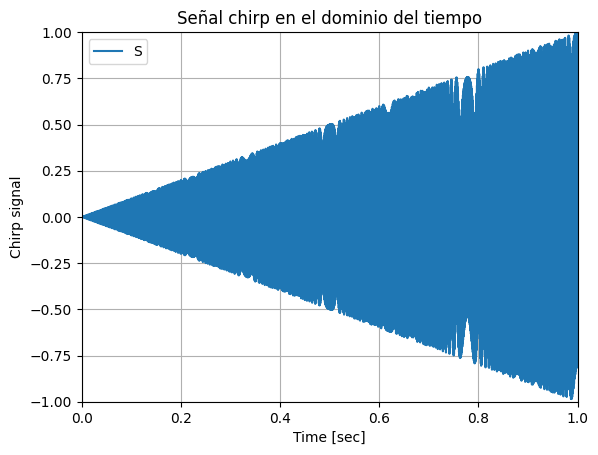

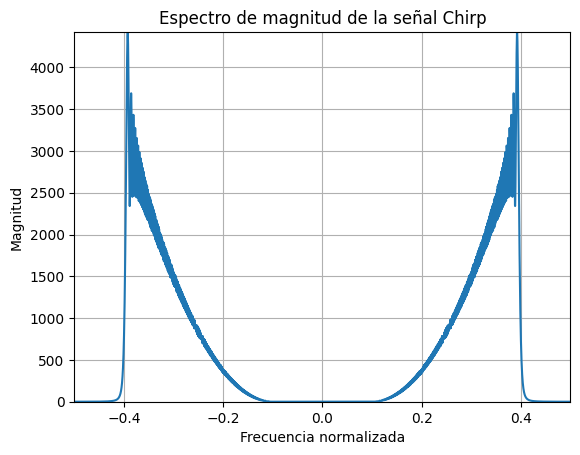

In [4]:
fs = 4e3 #Frecuencia de muestreo variable
f_ini = 0.1*fs #Frecuencia inicial
f_end = 0.4*fs #Frecuencia final
A_ini = 0 #Amplitud inicial 
A_end = 1 #Amplitud final
#Por el contexto del problema se puede entender que la frecuencia normalizada es respecto a la frecuencia de muestreo
# fNyquist = fs/2
# si fNyquist= 0.5 entonces fs = 1 
t = np.arange(A_ini,A_end,1/fs)
signal = t*chirp(t, f0=f_ini, f1=f_end, t1=1, method='linear') #Hacemos que la frecuencia esté cambiando de acuerdo a lo indicado 
#------------PLOTEAMOS LA SEÑAL EN EL TIEMPO
plt.figure(1)
plt.plot(t,signal)
plt.xlim([0,1])
plt.ylim([-1,1])
plt.grid('on')
plt.xlabel('Time [sec]')
plt.ylabel('Chirp signal') #Chirp es una señal usada en la que se varía la frecuencia a medida de que el tiempo avanza
plt.title('Señal chirp en el dominio del tiempo')
plt.legend('Señal')
#---------------CALCULAMOS LA TRANSFORMADA DE FOURIER Y LA PLOTEAMOS NORMALIZADA
fft_signal = np.fft.fftshift(np.fft.fft(signal)) #Calculamos la tranformada de fourier
spc = np.abs(fft_signal)**2 #Obtenemos el cuadrado de la magnitud del espectro 
Ns= len(signal)
freq = ((np.arange(Ns) - Ns/2) * fs/ Ns)/(fs) #Graficamos normalizando
plt.figure(2)
plt.plot(freq, spc)
plt.xlim([-0.5,0.5])
plt.grid('on')
plt.xlabel("Frecuencia normalizada")
plt.title("Espectro de magnitud de la señal Chirp")
plt.ylim([0,np.max(spc)])
plt.ylabel("Magnitud")

Respuesta a) : Se generó una señal en la que se varía la amplitud y la frecuencia linealmente a medida de que se avanza en el tiempo , para generar esta señal se uso la librería scipy que nos brinda diversas formas de generar señales , como es el caso de una función chirp que cumple con la condición de tener frecuencia que aumenta a medida de que avanza el tiempo. Se genero teniendo en cuenta que fs era el equivalente a 1 (como referencia) para el rango de frecuencia que iba a barrer la función Chirp. Al plotear podemos observar como sí se cumplen las propiedades antes descritas, la amplitud crece linealmente y la frecuencia aumenta considerablemente. 

Por otro lado , al obtener las transformada de Fourier sucede algo coherente ya que tiene principalmente componentes de 0.1 a 0.4 en frecuencia normalizada ; estos valores fueron indicados al generar la señal en chirp por lo que es consistente con la teoría , además la tendencia de la gráfica ya que el espectro tiende a aumentar su magnitud a medida de que aumenta la frecuencia hasta llega a 0.4 (normalizado) esto tiene sentido ya que en el tiempo al llegar a mayores frecuencia estas tenían mayor magnitud.

Pregunta 2:
Se busca realizar la decimaci´on con factor 2 (reducir a la mitad la frecuencia
de muestreo) de una se˜nal de audio. La se˜nal se encuentra corrompida por tono
sinusuidal en una frecuencia mayor a la que se˜nal de audio original se encuentra,
para ello se realizar´a lo siguiente:

a) (1 pto.) Leer el archivo audio.wav, identificar la frecuencia de muestreo y
en base a ello generar un vector de tiempos. Graficar la se˜nal en el tiempo
y su espectro en frecuencia en Hz.

In [5]:
from scipy.io import wavfile

La frecuencia de muestreo usada en el audio es de :  3000 Hz


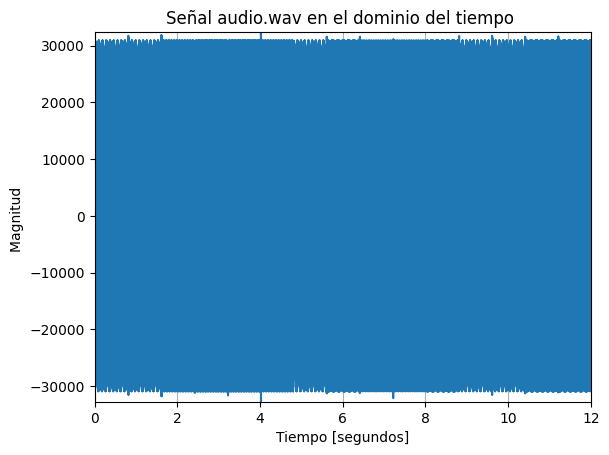

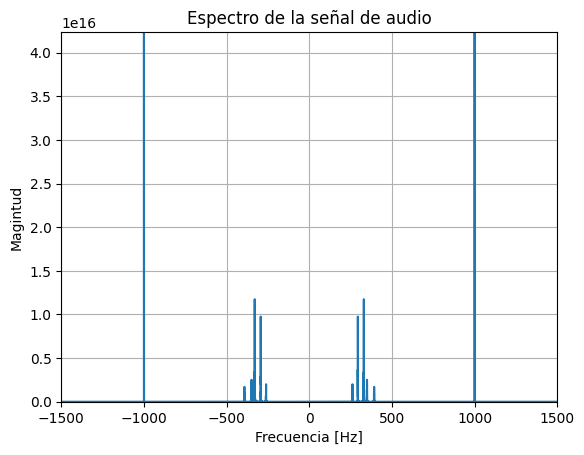

In [9]:
fs, y_t = wavfile.read('audio.wav') #Extraemos la frecuencia de muestreo (metadata) y los valores del arreglo
print(f"La frecuencia de muestreo usada en el audio es de :  { fs} Hz")
time_array = np.arange(len(y_t))/fs #Arreglo de tiempos
Ns = len(y_t)
#---------------PLOTEAMOS LA SEÑAL EN EL TIEMPO-------------
plt.figure(1)
plt.plot( time_array, y_t)
plt.title("Señal audio.wav en el dominio del tiempo ")
plt.xlim([0,12])
plt.ylim([np.min(y_t)  ,  np.max(y_t)])
plt.xlabel("Tiempo [segundos]")
plt.ylabel("Magnitud ")
plt.grid("on")
plt.show()
#--------------OBTENEMOS EL ESPECTRO Y PLOTEAMOS-----------
fft_yt = np.fft.fftshift(np.fft.fft(y_t)) #Hallamos la transformada de fourier
esp = np.abs(fft_yt)**2 #Calculamos el cuadrado de la magnitud 
freq = ((np.arange(Ns) - Ns/2) * fs/ Ns) #Graficamos normalizando
plt.figure(2)
plt.plot( freq, esp)
plt.title("Espectro de la señal de audio")
plt.xlim([-0.5*fs , 0.5*fs]) #Frecuencia normalizada
plt.ylim([np.min(esp)  ,  np.max(esp)])
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magintud")
plt.grid("on")
plt.show()

Comentario:  Al plotear las gráficas en el dominio del tiempo podemos observar la duración del audio y todas las magnitudes que toma a lo largo del tiempo, Al escuchar la canción se puede estipular apriori que dicha señal está compuesta en su mayoría por tonos. Normalmente las piezas musicales de piano son tonos de una u otra forma . Luego esto se confirma al ver el espectro de la señal donde vemos que el espectro está compuestp en su mayoría por impulsos  (tonos) .Podemos ver que hay un tono predominante a los 1000 Hz (muy distante de la mayoría que se encuentran concentrados más cerca al centro del espectro).